# Pointcloud interpolation 
### Collecting data

In [4]:
from data_splitter import DataSplitter

# # Split rviz selected data
ground_truth_name = "pass1_part2.yaml"
splitter = DataSplitter("../data", ground_truth_name)
splitter.split_rviz_selection_data()
splitter.merge_features_into_csv()



### Load algorithm data

In [5]:
from data_splitter import DataSplitter
test_alg_name = "pass1_fast_file"
algorithm_splitter = DataSplitter("../data", test_alg_name)
algorithm_splitter.split_node_data()
# algorithm_splitter.merge_features_into_csv()


### Load Algorithm data and selected points


In [1]:
import numpy as np
from data_loader import DataLoader
from feature import get_features_from_loader
tp_loader = DataLoader("../data", "fall_corrected")
tp_features = get_features_from_loader(tp_loader)

alg_loader = DataLoader("../data", "pass2_alg")
alg_features = get_features_from_loader(alg_loader)

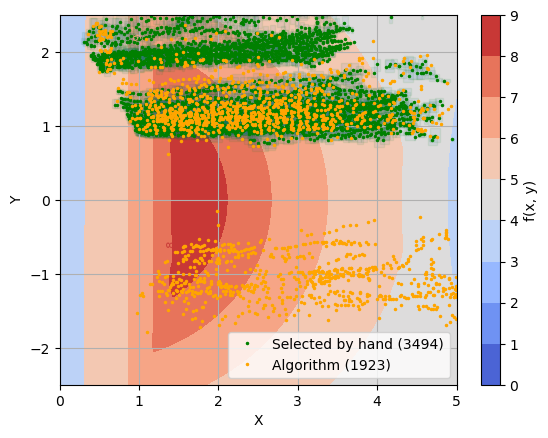

In [2]:
import matplotlib.pyplot as plt
from contours import add_levels_to_plot
from plot_utils import plot_feature, plot_feature_with_bbox

# Plot features
fig = plt.figure()
ax = fig.add_subplot(111)


# Plot the mean point
add_levels_to_plot(ax)
# ax.set_title(f"Positions with sizes of {len(tp_mean_points_x)} objects.")
plot_feature_with_bbox(
    ax, tp_features, f"Selected by hand ({len(tp_features)})", "g", "g"
)
plot_feature(ax, alg_features, f"Algorithm ({len(alg_features)})", "orange")

ax.grid(True)

# Set plot limits
ax.set_xlim(0, 5)
ax.set_ylim(-2.5, 2.5)

# Set labels
ax.set_xlabel("X")
ax.set_ylabel("Y")


ax.legend()


## Find same


In [3]:
from collections import defaultdict
from feature import group_features_by_timestamp, is_point_in_bounding_box, distance


# return timestamp_dict
grouped_features = group_features_by_timestamp(tp_features, alg_features)
alg_true = []
alg_false = []
tp_true = []

grouped_features = dict(sorted(grouped_features.items()))
i = 0
for key, features_at_timestamp in grouped_features.items():
    selected_features_at_this_time = features_at_timestamp["tp"]
    algorithm_features_at_this_time = features_at_timestamp["alg"]
    i += 1

    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # ax.set_title(f"At {key}")
    # ax.grid()
    # # Set plot limits
    # ax.set_xlim(0, 5)
    # ax.set_ylim(-2.5, 2.5)

    # # Set labels
    # ax.set_xlabel("X")
    # ax.set_ylabel("Y")

    # plot_feature_with_bbox(ax, selected_features_at_this_time, f"Selected by hand ({len(selected_features_at_this_time)})", "g", "g")
    # plot_feature(ax, algorithm_features_at_this_time, f"Algorithm ({len(algorithm_features_at_this_time)})", "orange")
    # ax.legend()

    # if i > 10:
    #     break

    for tp_feature in selected_features_at_this_time:
        for alg_feature in algorithm_features_at_this_time:
            if is_point_in_bounding_box(
                alg_feature.mean_point, tp_feature.box_size, tp_feature.box_center
            ):
                alg_true.append(alg_feature)
                selected_features_at_this_time.pop(
                    selected_features_at_this_time.index(tp_feature)
                )
                algorithm_features_at_this_time.pop(
                    algorithm_features_at_this_time.index(alg_feature)
                )
                # found = True
                break
            else:
                distance_ = distance(tp_feature.box_center, alg_feature.mean_point)

    for alg_feature in algorithm_features_at_this_time:
        alg_false.append(alg_feature)

    for tp_feature in selected_features_at_this_time:
        tp_true.append(tp_feature)

print(
    f"Found true {len(alg_true)}  found false {len(alg_false)} cannot find {len(tp_true)}"
)
print()

Found dict_keys([]) timestamps
Distance between [4.9489721496850505, 0.8221043945, 0.4865402981130529] and [3.78479981, -1.02213192, 0.581282914] is 2.1809412693166013
Distance between [4.9489721496850505, 0.8221043945, 0.4865402981130529] and [1.6804378, -0.824975133, 0.331110299] is 3.6600802948816162
Distance between [3.7074167057095684, 1.36022025, 0.7071047218611191] and [3.7675159, -0.908546805, 0.586967349] is 2.26956292334179
Distance between [3.604558979761587, 1.3481451899999999, 0.731145002778465] and [3.7018652, -1.00257945, 0.592493534] is 2.3527377315800027
Distance between [3.604558979761587, 1.3481451899999999, 0.731145002778465] and [1.58492994, -0.799006164, 0.532302856] is 2.947738182951862
Distance between [3.651406939229158, 2.3283695, 0.7774383319495324] and [3.7018652, -1.00257945, 0.592493534] is 3.3313311068679616
Distance between [3.651406939229158, 2.3283695, 0.7774383319495324] and [1.58492994, -0.799006164, 0.532302856] is 3.74844043998602
Distance between 

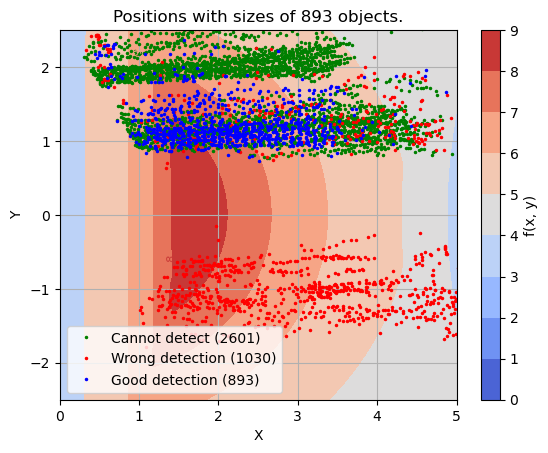

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from contours import add_levels_to_plot

# Plot features
fig = plt.figure()
ax = fig.add_subplot(111)


true_alg_means = [true_feature.mean_point for true_feature in alg_true]
false_alg_means = [false_feature.mean_point for false_feature in alg_false]
tp_true_means = [tp.mean_point for tp in tp_true]


true_x = []
true_y = []
for i in range(len(true_alg_means)):
    true_x.append(true_alg_means[i][0])
    true_y.append(true_alg_means[i][1])

false_x = []
false_y = []
for i in range(len(false_alg_means)):
    false_x.append(false_alg_means[i][0])
    false_y.append(false_alg_means[i][1])

tp_true_x = []
tp_true_y = []
for i in range(len(tp_true_means)):
    tp_true_x.append(tp_true_means[i][0])
    tp_true_y.append(tp_true_means[i][1])


ax.set_title(f"Positions with sizes of {len(true_alg_means)} objects.")
add_levels_to_plot(ax)

ax.plot(
    tp_true_x,
    tp_true_y,
    ".",
    c="g",
    label=f"Cannot detect ({len(tp_true_means)})",
    markersize=3,
)
ax.plot(
    false_x,
    false_y,
    ".",
    c="r",
    label=f"Wrong detection ({len(false_alg_means)})",
    markersize=3,
)
ax.plot(
    true_x,
    true_y,
    ".",
    c="b",
    label=f"Good detection ({len(true_alg_means)})",
    markersize=3,
)
ax.grid(True)

# Set plot limits
ax.set_xlim(0, 5)
ax.set_ylim(-2.5, 2.5)

# Set labels
ax.set_xlabel("X")
ax.set_ylabel("Y")

ax.legend(loc="lower left")

# Selecting points inside f(x, y)

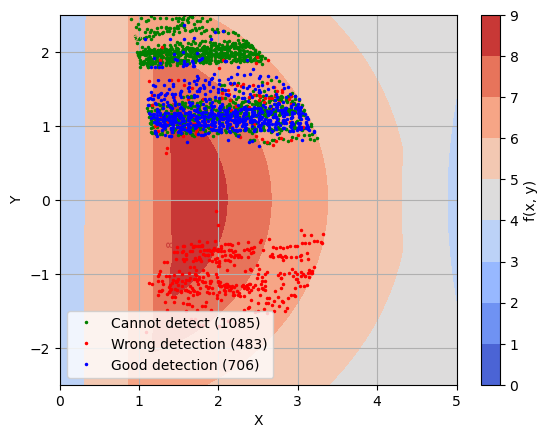

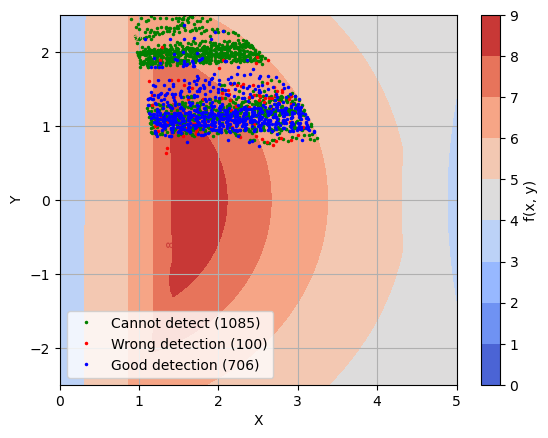

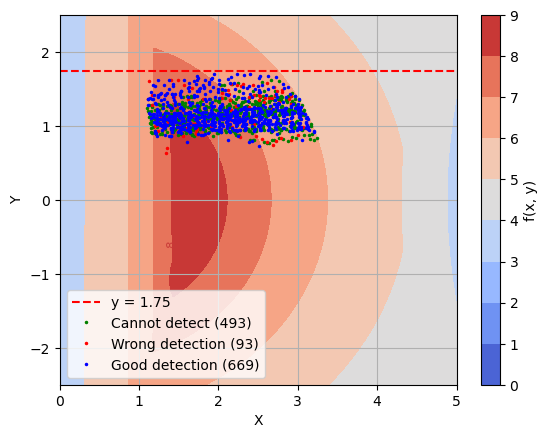

In [6]:
from contours import f


def get_mean_points_at_levels(points, down, up):
    points_at_levels = []
    for mean in points:
        index = int(np.ceil((f(mean[0], mean[1]))))
        if index > down and index < up:
            points_at_levels.append(mean)
    return points_at_levels


def get_x_and_y_from_means(means):
    x = []
    y = []
    for i in range(len(means)):
        x.append(means[i][0])
        y.append(means[i][1])
    return x, y


def plot_compare(ax, good, wrong, cannot):
    good_x, good_y = get_x_and_y_from_means(good)
    wrong_x, wrong_y = get_x_and_y_from_means(wrong)
    tp_x, tp_y = get_x_and_y_from_means(cannot)

    add_levels_to_plot(ax)
    ax.plot(
        tp_x,
        tp_y,
        ".",
        c="g",
        label=f"Cannot detect ({len(cannot)})",
        markersize=3,
    )
    ax.plot(
        wrong_x,
        wrong_y,
        ".",
        c="r",
        label=f"Wrong detection ({len(wrong)})",
        markersize=3,
    )

    ax.plot(
        good_x,
        good_y,
        ".",
        c="b",
        label=f"Good detection ({len(good)})",
        markersize=3,
    )

    ax.grid(True)

    # Set plot limits
    ax.set_xlim(0, 5)
    ax.set_ylim(-2.5, 2.5)

    # Set labels
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    ax.legend(loc="lower left")
    # Show the plot
    plt.show()


clamped_good = get_mean_points_at_levels(true_alg_means, 6, 10)
clamped_wrong = get_mean_points_at_levels(false_alg_means, 6, 10)
clamped_cannot = get_mean_points_at_levels(tp_true_means, 6, 10)

fig = plt.figure()
ax = fig.add_subplot(111)
plot_compare(ax, clamped_good, clamped_wrong, clamped_cannot)

# remove wrong points where y is negative
clamped_wrong_with_positive_y = [point for point in clamped_wrong if point[1] > 0]
fig = plt.figure()
ax = fig.add_subplot(111)
plot_compare(ax, clamped_good, clamped_wrong_with_positive_y, clamped_cannot)

# plot line at y = 1.8
fig = plt.figure()
ax = fig.add_subplot(111)
y = 1.75
ax.axhline(y=y, color="r", linestyle="--", label=f"y = {y}")

clamped_good_1_row = [point for point in clamped_good if point[1] < y]
clamped_wrong_1_row = [point for point in clamped_wrong_with_positive_y if point[1] < y]
clamped_cannot_1_row = [point for point in clamped_cannot if point[1] < y]


plot_compare(ax, clamped_good_1_row, clamped_wrong_1_row, clamped_cannot_1_row)




Heatpoints

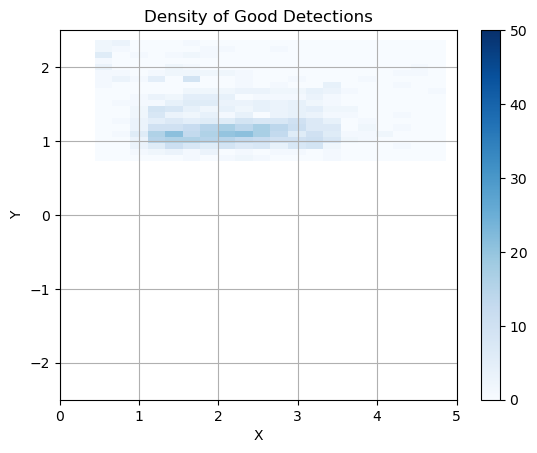

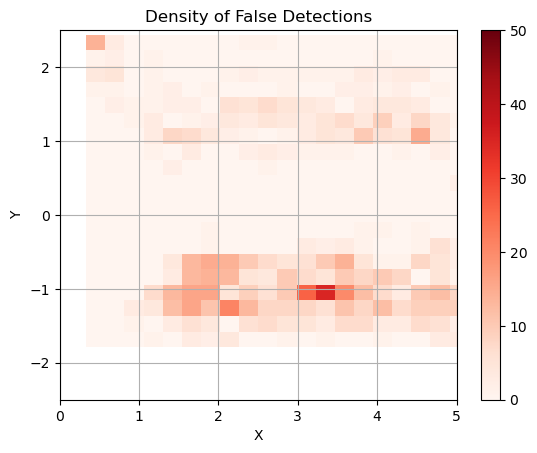

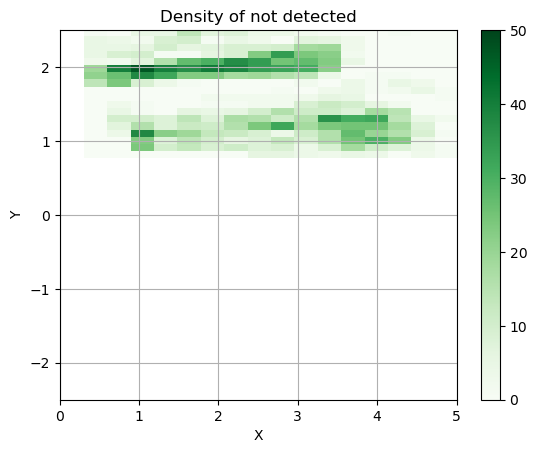

In [9]:
# Extract x and y coordinates of true detections
true_x = [feature.mean_point[0] for feature in alg_true]
true_y = [feature.mean_point[1] for feature in alg_true]

false_x = [feature.mean_point[0] for feature in alg_false]
false_y = [feature.mean_point[1] for feature in alg_false]

not_detected_x = [feature.mean_point[0] for feature in tp_true]
not_detected_y = [feature.mean_point[1] for feature in tp_true]

# Create histogram

plt.figure()
plt.hist2d(true_x, true_y, bins=20, cmap='Blues')
plt.title('Density of Good Detections')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.colorbar()
plt.xlim(0, 5)
plt.ylim(-2.5, 2.5)
plt.clim(0,50)



plt.figure()
plt.title('Density of False Detections')
plt.hist2d(false_x, false_y, bins=20, cmap='Reds')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.colorbar()
plt.xlim(0, 5)
plt.ylim(-2.5, 2.5)
plt.clim(0,50)


plt.figure()
plt.title('Density of not detected')

plt.hist2d(not_detected_x, not_detected_y, bins=20, cmap='Greens')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.colorbar()
plt.xlim(0, 5)
plt.ylim(-2.5, 2.5)
plt.clim(0,50)


# Show the plot
plt.show()


# Statistics

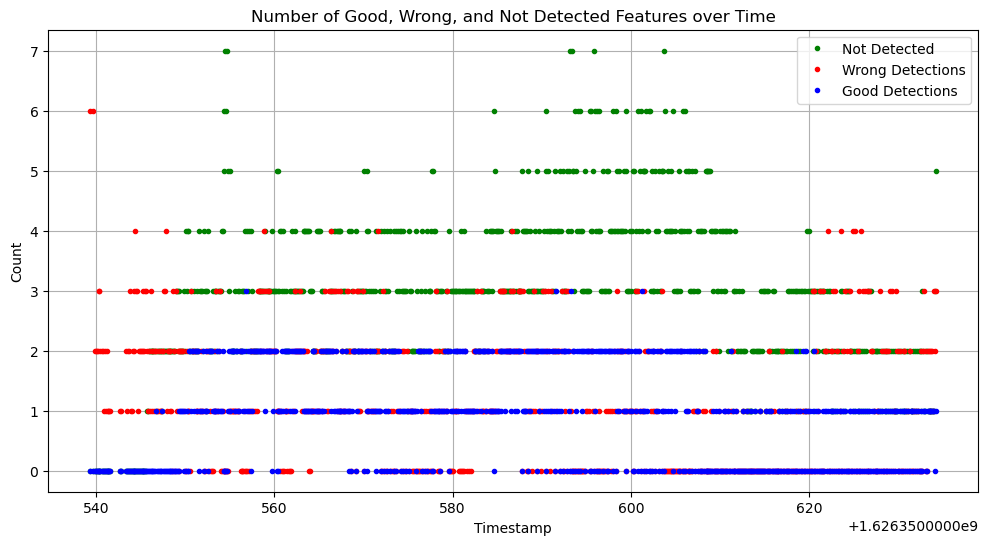

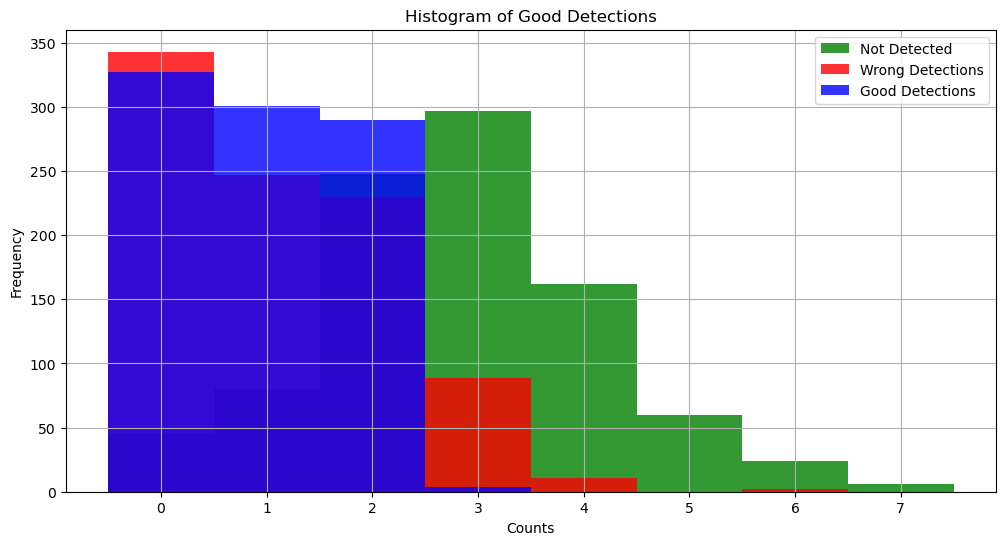

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
from copy import copy


def group_by_timestamp(features, grouped_features):
    timestamp_dict = defaultdict(list)
    for key in grouped_features.keys():
        timestamp_dict[key] = []
    for feature in features:
        timestamp = str(feature.sec) + "_" + str(feature.nanosec)
        timestamp_dict[timestamp].append(feature)
    return timestamp_dict


grouped_features_good_alg = group_by_timestamp(alg_true, grouped_features)
grouped_features_wrong_detect = group_by_timestamp(alg_false, grouped_features)
grouped_features_cannot_detect = group_by_timestamp(tp_true, grouped_features)

all_timestamps = [float(int(key.split("_")[0])) + float(int(key.split("_")[1]))*1e-9 for key in grouped_features.keys()]
good_counts = [len(features) for features in grouped_features_good_alg.values()]
wrong_counts = [len(features) for features in grouped_features_wrong_detect.values()]
not_detected_counts = [len(features) for features in grouped_features_cannot_detect.values()]

ax.plot(all_timestamps, not_detected_counts, '.', label="Not Detected", color="green", linewidth=0.5)
ax.plot(all_timestamps, wrong_counts, '.', label="Wrong Detections", color="red", linewidth=0.5)
ax.plot(all_timestamps, good_counts, '.', label="Good Detections", color="blue", linewidth=0.5)
ax.set_xlabel("Timestamp")
ax.set_ylabel("Count")
ax.legend()
ax.grid(True)
ax.set_title("Number of Good, Wrong, and Not Detected Features over Time")


plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
# Calculate the center of each bin
bin_centers = np.arange(0, max(not_detected_counts)+2) - 0.5

# 
ax.hist(not_detected_counts, bins=bin_centers, color="green", alpha=0.8, label="Not Detected")
ax.hist(wrong_counts, bins=bin_centers, color="red", alpha=0.8, label="Wrong Detections")
ax.hist(good_counts, bins=bin_centers, color="blue", alpha=0.8, label="Good Detections")
ax.set_xlabel("Counts")
ax.set_ylabel("Frequency")
ax.legend()
ax.xticks = bin_centers
ax.grid(True)
ax.set_title("Histogram of Good Detections")
plt.show()